This tutorial was partially adapted from http://enipedia.tudelft.nl/wiki/OpenRefine_Tutorial, where you can learn more about Open Refine. It used to be called Google Refine so try that too when you are searching for information. However, in our case, we use python to do the same thing.

# Downloading Data

The university data can be downloaed from http://enipedia.tudelft.nl/enipedia/images/f/ff/UniversityData.zip

## What you can learn

The data contains quite a few issues, and this tutorial shows how to do things like:

- Cleaning up inconsistent spelling of terms (i.e. "USA", "U.S.A", "U.S.", etc).
- Converting values that are text descriptions of numeric values (i.e. $123 million) to actual numeric values (i.e. 123000000) which are usable for analysis.
- Identifying which rows of a specific column contain a search term
- Extracting and cleaning values for dates
- Removing duplicate rows
- Using a scatterplot to visualize relationships between values in different columns
- Finding geographic coordinates for a list of place names (i.e. the names of universities, etc.)
- Exporting cleaned data to Excel

# Reading Data with Pandas

In [487]:
%matplotlib inline
import sys
import pandas as pd
import statsmodels.api as sm
from collections import Counter, defaultdict
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [579]:
df = pd.read_csv('universityData.csv', sep = '\t', encoding = 'utf-8')

df.head()

,university,endowment,numFaculty,numDoctoral,country,numStaff,established,numPostgrad,numUndergrad,numStudents
0,Paris Universitas,15,5500,8000,France,NaN,2005,NaN,25000,70000
1,Paris Universitas,15,5500,8000,France,NaN,2005,NaN,25000,70000
2,Lumi%C3%A8re University Lyon 2,121,NaN,1355,France,NaN,1835,7046,14851,27393
3,Confederation College,4700000,NaN,NaN,Canada,NaN,1967,not available,pre-university students; technical,21160
4,Rocky Mountain College,16586100,NaN,NaN,United States,NaN,1878,66,878,894


In [580]:
print df.university[2]

Lumi%C3%A8re University Lyon 2


Apparently, there are duplicate rows.

In [489]:
len(df)

75043

# Deduplicate entries

In [490]:
df = df.drop_duplicates()
len(df)

15534

We already see an issue here where there is both the full name of a country (United States) and its abbreviation (US). To fix this, we can just copy/paste "United States" as the new cell value.


# Clean up country names

In [491]:
df['country'].unique()

array(['France', 'Canada', 'United States', 'USA', 'Italy', 'South Korea',
       'Japan', 'United States of America', 'England, UK',
       'United States )', 'Saudi Arabia', 'Honduras', 'United Kingdom',
       'England', 'the Netherlands', 'India', 'Russia', 'U.S.', 'Brazil',
       'US', 'U.S.A.', 'Philippines', 'Australia',
       'England, United Kingdom', 'Wales', ',', 'China', 'South Africa',
       'UK', 'Puerto Rico', 'Bulgaria', 'Botswana', 'Taiwan', 'Sri Lanka',
       'Colombia', 'Iran', 'Russian Federation', 'Rossija', 'Finland',
       'Republic of China', 'Chile', 'Romania', 'Utopia', 'Singapore',
       'Lebanon', 'Turkey', 'Canada B1P 6L2', 'Jordan', 'Albania',
       'Canada C1A 4P3 Telephone: 902-566-0439 Fax: 902-566-0795',
       'Scotland', 'Pakistan', 'Scotland, United Kingdom', 'Denmark',
       'Mexico', 'Thailand', 'Argentina', 'Cura%C3%A7ao', 'Sweden',
       'Scotland, UK', 'Bangladesh', 'Nepal', 'Netherlands', 'Switzerland',
       'Egypt', 'Spain', 'Satel

In [492]:
country_df = df.groupby('country').size()
for k in country_df.index:
    print(k, country_df[k])

(',', 2)
('Albania', 8)
('Argentina', 1)
('Australia', 49)
('Bangladesh', 27)
('Botswana', 1)
('Brazil', 10)
('Bulgaria', 2)
('Canada', 625)
('Canada B1P 6L2', 40)
('Canada C1A 4P3 Telephone: 902-566-0439 Fax: 902-566-0795', 1)
('Chile', 1)
('China', 4)
('Colombia', 1)
('Cura%C3%A7ao', 1)
('Denmark', 8)
('Egypt', 1)
('England', 338)
('England, UK', 286)
('England, United Kingdom', 64)
('Finland', 2)
('France', 8)
('Honduras', 1)
('India', 40)
('Iran', 9)
('Italy', 2)
('Japan', 112)
('Jordan', 2)
('Lebanon', 5)
('Mexico', 2)
('Nassau, Bahamas Fort Myers, FL Jacksonville, FL Miami, FL Miramar, FL Orlando, FL Palm Beach, FL Tampa, FL', 1)
('Nepal', 4)
('Netherlands', 2)
('Pakistan', 2)
('Philippines', 147)
('Puerto Rico', 2)
('Republic of China', 1)
('Romania', 1)
('Rossija', 2)
('Russia', 1)
('Russian Federation', 2)
('Satellite locations:', 1)
('Saudi Arabia', 1)
('Scotland', 64)
('Scotland, UK', 16)
('Scotland, United Kingdom', 16)
('Singapore', 4)
('South Africa', 7)
('South Korea', 7

In [493]:
us_condition = df['country'].isin(['U.S.', 'U.S.A.', 'US', 'United States', 'United States )', 'United States of America'])
df['country'][us_condition]  = 'USA'

In [494]:
ca_condition =[]
for i in df['country']:
    if i.__contains__('Canada'):
        ca_condition.append(True)
    else:
        ca_condition.append(False)
df['country'][ca_condition]  = 'Canada'

In [495]:
ca_condition =[]
for i in df['country']:
    if i.__contains__('China'):
        ca_condition.append(True)
    else:
        ca_condition.append(False)
df['country'][ca_condition]  = 'China'

In [496]:
ca_condition =[]
for i in df['country']:
    if i.__contains__('England'):
        ca_condition.append(True)
    else:
        ca_condition.append(False)
df['country'][ca_condition]  = 'England'

In [497]:
ca_condition =[]
for i in df['country']:
    if i.__contains__('Scotland'):
        ca_condition.append(True)
    else:
        ca_condition.append(False)
df['country'][ca_condition]  = 'England'

In [498]:
uk_condition = df['country'].isin(['UK', 'United Kingdom', 'Wales'])
df['country'][uk_condition]  = 'England'

In [499]:
ca_condition =[]
for i in df['country']:
    if i.__contains__('Netherlands'):
        ca_condition.append(True)
    else:
        ca_condition.append(False)
df['country'][ca_condition]  = 'Netherlands'

In [500]:
ca_condition =[]
for i in df['country']:
    if i.__contains__('Russia'):
        ca_condition.append(True)
    else:
        ca_condition.append(False)
df['country'][ca_condition]  = 'Russia'

In [501]:
ca_condition =[]
for i in df['country']:
    if i.__contains__('Bahamas'):
        ca_condition.append(True)
    else:
        ca_condition.append(False)
df['country'][ca_condition]  = 'Bahamas'

In [502]:
'Russian Federation'.__contains__('Russia')

True

In [503]:
uk_condition = df['country']=='Cura%C3%A7ao'
df['country'][uk_condition]  = "Curacao"

In [504]:
df[df['country']==',']

,university,endowment,numFaculty,numDoctoral,country,numStaff,established,numPostgrad,numUndergrad,numStudents
2130,Universidad Ju%C3%A1rez Aut%C3%B3noma de Tabasco,23760.0,2188,NaN,",",1087,1958-11-20,971,24921,35271
3077,Universidad Ju%C3%A1rez Aut%C3%B3noma de Tabasco,34140.0,2188,NaN,",",1087,1958-11-20,971,24921,35271



Universidad Juárez Autónoma de Tabasco is a public institution of higher learning located in Villahermosa, Tabasco, Mexico.

In [505]:
uk_condition = df['country']==','
df['country'][uk_condition]  = "Mexico"

In [506]:
df[df['country']=='Satellite locations:']

,university,endowment,numFaculty,numDoctoral,country,numStaff,established,numPostgrad,numUndergrad,numStudents
75009,Nova Southeastern University,US $64.5 million,2083,NaN,Satellite locations:,4319,1964,22060,6397,28457


Nova Southeastern University (NSU) is a private nonprofit university, with a main campus located on 300 acres (120 ha) in Davie, in the US state of Florida. Formerly referred to as "Nova" and now commonly called "NSU", the university currently consists of 18 colleges and schools offering over 175 programs of study with more than 250 majors.

In [507]:
uk_condition = df['country']=='Satellite locations:'
df['country'][uk_condition]  = "USA"

In [508]:
country_df = df.groupby('country').size()
for k in country_df.index:
    print(k, country_df[k])

('Albania', 8)
('Argentina', 1)
('Australia', 49)
('Bahamas', 1)
('Bangladesh', 27)
('Botswana', 1)
('Brazil', 10)
('Bulgaria', 2)
('Canada', 666)
('Chile', 1)
('China', 5)
('Colombia', 1)
('Curacao', 1)
('Denmark', 8)
('Egypt', 1)
('England', 1274)
('Finland', 2)
('France', 8)
('Honduras', 1)
('India', 40)
('Iran', 9)
('Italy', 2)
('Japan', 112)
('Jordan', 2)
('Lebanon', 5)
('Mexico', 4)
('Nepal', 4)
('Netherlands', 4)
('Pakistan', 2)
('Philippines', 147)
('Puerto Rico', 2)
('Romania', 1)
('Rossija', 2)
('Russia', 3)
('Saudi Arabia', 1)
('Singapore', 4)
('South Africa', 7)
('South Korea', 7)
('Spain', 1)
('Sri Lanka', 4)
('Sweden', 24)
('Switzerland', 8)
('Taiwan', 1)
('Thailand', 4)
('Turkey', 4)
('USA', 13062)
('Utopia', 1)


# Clean up values for the number of students



We need to clean the data for the number of students. Not all of the values are numeric, and many of them contain bits of text in addition to the actual number of the students.
To figure out which entries need to be fixed, we need to use a Numeric facet:

In [509]:
df.describe()

,university,endowment,numFaculty,numDoctoral,country,numStaff,established,numPostgrad,numUndergrad,numStudents
count,15534,15504,13541,602,15534,3166,15534,15183,15532,13830
unique,1085,1172,601,63,47,352,448,887,1104,698
top,Pennsylvania State University,1.708E9,8864,60,USA,3373,1855,800,"77,179 Total",800
freq,8960,4480,8960,192,13062,216,8970,651,896,564


In [510]:
df.numStudents.unique()

array(['70000', '27393', '21160', '894', '15553', '62801', '65234', nan,
       '15424', '4533', '5756', '24424', '2426', '7730', '2987', '10477',
       '13773', '14388', '14522', '32472', '40829', '17101', '7497',
       '2400', '7306', '17500', '4463', '2200', '6448', '4863', '900+',
       '13570', '4927', '32739', '1604', '2499', '13785', '16317', '339',
       '1874', '10790', '4494', '4836', '4176', '4352', '30819', '6314',
       '26851', '3251', '616', '49589', '50116', '3224', '52405',
       '~50,000', '7773', '3785', '3822', '5000', '20712', '21000',
       '21048', '7787', '17231', '18502', '6158', '11804', '36041',
       '38912', '29390', '1207', '3090', '3249', '24370', '2654', '2815',
       '15705', '14575', '1144', '10235', '1015', '3657', '1033', '1062',
       '9840', '32762', '14806', '10623', '13438', '18900', '23420',
       '3192', '2480', '12125', '4800', '30930', '7848', '5560', '12130',
       '25063', '25277', '16567', '12270', '2566', '7881', '1972', '1779

In [511]:
float('5.29092E7')

52909200.0

In [512]:
df.numStudents = [str(i).replace('+', '').replace('~', '') for i in df.numStudents]
df.numStudents = [str(i).replace(',', '').replace('-', '').strip() for i in df.numStudents]
df.numStudents = [i.split(' ')[0] for i in df.numStudents]

In [513]:
# https://stackoverflow.com/questions/4138202/using-isdigit-for-floats
def isDigit(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

In [514]:
isDigit('1130.0')

True

In [515]:
str.isdigit('1130.0')

False

In [516]:
df['numStudents'] = df['numStudents'].apply(lambda x: np.float(x) 
                            if isDigit(x)
                            else np.nan)

In [517]:
odds = {}
for i in df['numStudents']:
    if not isDigit(i):
        try:
            odds[i] += 1
        except:
            odds[i] = 1

In [518]:
len(df)

15534

In [519]:
odds

{}

In [520]:
df.numStudents.iloc[0]

70000.0

In [521]:
df.numStudents.unique()[:10]

array([ 70000.,  27393.,  21160.,    894.,  15553.,  62801.,  65234.,
           nan,  15424.,   4533.])

In [522]:
df.numStudents.max(), df.numStudents.min()

(4197033329.0, 2.0)

In [523]:
# df.numStudents.astype('float')

In [524]:
# pd.to_numeric(df.numStudents)#, errors='ignore')

In [525]:
df.describe()

,numStudents
count,1.380000e+04
mean,3.934969e+05
std,3.585477e+07
min,2.000000e+00
25%,1.065000e+03
50%,1.068800e+04
75%,3.397700e+04
max,4.197033e+09


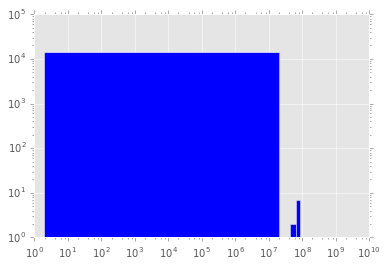

In [526]:
plt.hist(df.numStudents.dropna(), bins = 200, color='blue')
plt.yscale('log')
plt.xscale('log')
plt.show()

# Clean up values for the endowment

First remove the numeric facet for numStudents and create a new numeric facet for endowment. Select only the non-numeric values, as was done for the number of students.
Already we see issues like "US$1.3 billion" and "US $186 million"

In [527]:
df['endowment']

0                       15
2                      121
3                  4700000
4                 16586100
5                 16586100
6                 40200750
7                 40200750
8                 40200750
9                 40200750
10                40200750
11                40200750
12                40200750
13                40200750
14                40200750
15                40200750
16                40200750
17                40200750
18               562000000
19               562000000
22                     NaN
23                     NaN
24                     NaN
25                     NaN
26                     NaN
27                   1.3E7
28                   1.0E7
29                   3.5E8
30                   4.5E8
31                     0.0
32                     0.0
               ...        
74996        $2,17 billion
74997        $2,17 billion
74998        $2,17 billion
74999        $2,17 billion
75000        $2,17 billion
75001        $2,17 billion
7

In [528]:
np.sum(odds.values())

0.0

In [529]:
odds = {}
for i in df['endowment']:
    if not isDigit(i):
        try:
            odds[i] += 1
        except:
            odds[i] = 1

odds.items()

[('US$226 million', 1),
 ('US $6.44 billion', 16),
 ('1,5 billion \xe2\x82\xac', 1),
 ('US $988.626', 1),
 ('USD$130.0 million', 1),
 ('S$830 million', 2),
 ('$772.8 million AUD', 2),
 ('CHF 193.64 million annual budget', 4),
 ('US $620 million', 2),
 ('US $7.2 billion', 1),
 ('US $64.5 million', 3),
 ('US $612 million', 4),
 ('US$668 million', 1),
 ('US $12,197,377', 1),
 ('US $13,111,000', 1),
 ('US$13.3 million', 1),
 ('US $1.77 billion', 32),
 ('R$ 43.518 million', 1),
 ('Rs1 billion', 1),
 ('U.S. $ n/a', 1),
 ('C$143 million', 1),
 ('US $1.786 billion', 16),
 ('US $ 398.9 million', 1),
 ('US$ 270.6 million', 2),
 ('State: US$101 million', 1),
 ('US $388.7 million', 6),
 ('US $24,011,651', 4),
 ('USD $54.500 million', 1),
 ('US$ 12 million', 1),
 ('US $29 million', 1),
 ('US$582 million  Beneficiary of Duke Endowment', 1),
 ('US$ 800 million', 1),
 ('US $380 million', 2),
 ('US$28.6 million', 1),
 ('US$49 million', 1),
 ('INR 40 Crore', 4),
 ('US $16.7 billion', 1),
 ('\xc2\xa3 61.

In [530]:
np.float('1E6')

1000000.0

In [531]:
df.endowment = [str(i).replace('US $', '').replace('US$', '') for i in df.endowment]
df.endowment = [str(i).replace('USD$', '').replace('USD $', '') for i in df.endowment]
df.endowment = [str(i).replace('U.S. $', '').replace(',', '').strip() for i in df.endowment]

endowment = []
for i in df.endowment:
    if i.__contains__('$'):
        endowment.append(str(i).split('$')[1])
    else:
        endowment.append(i)
df.endowment = endowment

In [532]:
df.endowment = [str(i).replace(' million', 'E6').replace(' billion', 'E9').strip() for i in df.endowment]
df.endowment = [str(i).replace('million', 'E6').replace('billion', 'E9').strip() for i in df.endowment]
df.endowment = [str(i).replace(' Million', 'E6').replace(' Billion', 'E9').strip() for i in df.endowment]
df.endowment = [str(i).split(' ')[0] for i in df.endowment]
df.endowment = [str(i).replace('M', 'E6').strip() for i in df.endowment]
df.endowment = [str(i).replace(';', '').replace('+', '').strip() for i in df.endowment]
# df.endowment = [str(i).split('xbf')[1] for i in df.endowment]
# df.endowment = [str(i).split('xb')[1] for i in df.endowment]
# df.endowment = [str(i).split('xa')[1] for i in df.endowment]


After most of this has been cleaned up, select the non-numeric values, and delete them, just as was done for the numStudents.

In [533]:
df['endowment'] = df['endowment'].apply(lambda x: np.float(x) 
                            if isDigit(x)
                            else np.nan)

In [534]:
df.describe()

,endowment,numStudents
count,1.490400e+04,1.380000e+04
mean,2.149103e+09,3.934969e+05
std,1.927573e+10,3.585477e+07
min,0.000000e+00,2.000000e+00
25%,2.430000e+08,1.065000e+03
50%,1.546000e+09,1.068800e+04
75%,1.708000e+09,3.397700e+04
max,1.545840e+12,4.197033e+09


- 巴西雷亚尔的符号 R\$
- CANADA DOLLARS  C\$
- 澳元的货币符号 A\$

Both "million" and "Million" are in the values, so it's useful to convert all the values to lowercase instead of cleaning this up twice.


In [535]:
df.head()

,university,endowment,numFaculty,numDoctoral,country,numStaff,established,numPostgrad,numUndergrad,numStudents
0,Paris Universitas,15.0,5500,8000,France,NaN,2005,NaN,25000,70000.0
2,Lumi%C3%A8re University Lyon 2,121.0,NaN,1355,France,NaN,1835,7046,14851,27393.0
3,Confederation College,4700000.0,NaN,NaN,Canada,NaN,1967,not available,pre-university students; technical,21160.0
4,Rocky Mountain College,16586100.0,NaN,NaN,USA,NaN,1878,66,878,894.0
5,Rocky Mountain College,16586100.0,NaN,NaN,USA,NaN,1878,66,878,894.0


# Others

numFaculty, numDoctoral, numStaff, numPostgrad, numUndergrad, established


## numFaculty

In [536]:
df.numFaculty = [str(i).replace('Total: ', '').replace(',', '') for i in df.numFaculty]
df.numFaculty = [str(i).replace('>', '').replace('~', '') for i in df.numFaculty]
df.numFaculty = [str(i).split(' ')[0] for i in df.numFaculty]


In [537]:
df['numFaculty'] = df['numFaculty'].apply(lambda x: np.float(x) 
                            if isDigit(x)
                            else np.nan)

In [538]:
odds = {}
for i in df['numFaculty']:
    if not isDigit(i):
        try:
            odds[i] += 1
        except:
            odds[i] = 1

odds.items()

[]

## numDoctoral

In [539]:
odds = {}
for i in df['numDoctoral']:
    if not isDigit(i):
        try:
            odds[i] += 1
        except:
            odds[i] = 1

odds.items()

[('available', 1),
 ('N\\A', 27),
 ('not available', 40),
 ('N.A', 16),
 ('~25', 4)]

In [540]:
df.numDoctoral = [str(i).replace('~', '') for i in df.numFaculty]

In [541]:
df['numDoctoral'] = df['numDoctoral'].apply(lambda x: np.float(x) 
                            if isDigit(x)
                            else np.nan)

## numStaff

In [542]:
odds = {}
for i in df['numStaff']:
    if not isDigit(i):
        try:
            odds[i] += 1
        except:
            odds[i] = 1

odds.items()

[('incl. 1,403 academics and 150 researchers', 2),
 ('Total: 873', 48),
 ('Approximately 7,170', 1),
 ('approximately 30', 1),
 ('167 full-time academic faculty,  \n596 non-academic staff', 4),
 ('Around 120', 27),
 ('~500', 4),
 ('190 researchers & lecturers, 153 administrative & technical staff', 2),
 ('Approximately 500', 1),
 ('4,478 employees', 64),
 ('Around 5,000', 48),
 ('>21,000', 2),
 ('?', 1),
 ('~100', 4),
 ('full-time, part-time', 1),
 ('Total: 1,608', 2),
 ('Total: 1,600', 16),
 ('Full-time: 1,469', 2),
 ('156 full-time; 229 part-time', 1),
 ('Part-time: 139', 2),
 ('960 full-time, 460 part-time', 16),
 ('appx. 20', 8),
 ('~', 1)]

In [543]:
df.numStaff = [str(i).replace('Total: ', '').replace(',', '') for i in df.numStaff]
df.numStaff = [str(i).replace('>', '').replace('~', '') for i in df.numStaff]
df.numStaff = [str(i).replace('Around ', '').replace('appx. ', '') for i in df.numStaff]
df.numStaff = [str(i).replace(' employees', '').replace('Approximately ', '') for i in df.numStaff]
df.numStaff = [str(i).replace('Full-time: ', '').replace('Part-time: ', '') for i in df.numStaff]
df.numStaff = [str(i).replace('approximately ', '') for i in df.numStaff]
df.numStaff = [str(i).split(' ')[0] for i in df.numStaff]



In [544]:
df['numStaff'] = df['numStaff'].apply(lambda x: np.float(x) 
                            if isDigit(x)
                            else np.nan)

## numPostgrad

In [545]:
odds = {}
for i in df['numPostgrad']:
    if not isDigit(i):
        try:
            odds[i] += 1
        except:
            odds[i] = 1

odds.items()

[('268 full-time MBA', 24),
 ('approx. 300', 1),
 ('~650', 4),
 ('n/a', 1),
 ('Aprx. 2,000', 2),
 ('630 Dickinson School of Law', 640),
 ('120+', 8),
 ('795 Great Valley', 640),
 ('Does not offer postgraduate studies', 1),
 ('~3,914', 1),
 ('4,937 full-time, 1,446 part-time', 2),
 ('800 College of Medicine', 640),
 ('not available', 1),
 ('~3,200', 2),
 ('Masters of Business Administration in Community Economic Development', 20),
 ('Some postdoctoral students and visiting scholars', 1),
 ('postgraduate level degree available', 1),
 ('~160', 3),
 ('142 Ph.D. students', 2),
 ('1,682 Commonwealth Campuses', 640),
 ('available', 1),
 ('71 MLHR', 24),
 ('14,020 Total', 640),
 ('Approximately 1000', 1),
 ('Approx. 600', 1),
 ('----', 4),
 ('~500', 4),
 ('~5,500', 2),
 ('~60', 4),
 ('325 part-time MBA', 24),
 ('over 1,300', 1),
 ('N\\A', 9),
 ('none', 1),
 ('6,223 University Park', 640),
 ('ca. 3,230', 2),
 ('95 MAcc', 24),
 ('9,957 \xe2\x80\x93 Vancouver', 24),
 ('531 \xe2\x80\x93 Okanagan',

In [546]:
df.numPostgrad = [str(i).replace('~', '').replace(',', '') for i in df.numPostgrad]
df.numPostgrad = [str(i).replace('approx. ', '').replace('Approx. ', '') for i in df.numPostgrad]
df.numPostgrad = [str(i).replace('Approximately ', '').replace('Aprx. ', '') for i in df.numPostgrad]
df.numPostgrad = [str(i).replace('+', '').replace('over', '') for i in df.numPostgrad]

df.numPostgrad = [str(i).split(' ')[0] for i in df.numPostgrad]


In [547]:
df['numPostgrad'] = df['numPostgrad'].apply(lambda x: np.float(x) 
                            if isDigit(x)
                            else np.nan)

## numUndergrad

In [548]:
odds = {}
for i in df['numUndergrad']:
    if not isDigit(i):
        try:
            odds[i] += 1
        except:
            odds[i] = 1

odds.items()

[('4,747 full-time', 96),
 ('over 2,000', 1),
 ('Approximately 10,000', 1),
 ('2,000+', 8),
 ('approximately 1,500', 1),
 ('n/a', 1),
 ('Aprx. 2,000', 2),
 ('School of Liberal Arts; School of Science & Technology; School of Graduate & Professional Studies; Shannon School of Business',
  20),
 ('approx. 2,000', 1),
 ('36,518 \xe2\x80\x93 Vancouver', 24),
 ('~25,000', 2),
 ('65 per year', 1),
 ('77,179 Total', 896),
 ('approx. 1,200', 8),
 ('Approx. 12,000', 2),
 ('38,594  University Park', 896),
 ('32,295 Commonwealth Campuses', 896),
 ('Approximately 2,300', 1),
 ('7,004 \xe2\x80\x93 Okanagan', 24),
 ('~400', 1),
 ('pre-university students; technical', 1),
 ('Around 10,000', 2),
 ('available', 3),
 ('21,726 -', 24),
 ('None', 1),
 ('900+', 1),
 ('475 Resident Undergraduates', 1),
 ('ca. 3,046', 2),
 ('Approx. 7,100', 1),
 ('6,290 PA College of Tech', 896),
 ('4,634 World Campus', 896),
 ('28,477 full-time, 2,102 part-time', 2),
 ('none', 1),
 ('approx. 2,150', 4),
 ('Approximately 730'

In [549]:
df.numUndergrad = [str(i).replace('~', '').replace(',', '') for i in df.numUndergrad]
df.numUndergrad = [str(i).replace('approx. ', '').replace('Approx. ', '') for i in df.numUndergrad]
df.numUndergrad = [str(i).replace('Approximately ', '').replace('Aprx. ', '') for i in df.numUndergrad]
df.numUndergrad = [str(i).replace('approximately ', '').replace('Around ', '') for i in df.numUndergrad]
df.numUndergrad = [str(i).replace('+', '').replace('over', '') for i in df.numUndergrad]
df.numUndergrad = [str(i).split(' ')[0] for i in df.numUndergrad]

In [550]:
df['numUndergrad'] = df['numUndergrad'].apply(lambda x: np.float(x) 
                            if isDigit(x)
                            else np.nan)

## established

In [551]:
df.established

0                            2005
2                            1835
3                            1967
4                            1878
5                            1878
6                            1901
7                            1901
8                            1947
9                            1947
10                           1963
11                           1963
12       1963 - university status
13       1963 - university status
14       1947 - four-year college
15       1947 - four-year college
16                         1901 -
17                         1901 -
18                           1924
19                           1924
22                           1970
23                     1918-05-01
24                           1925
25               Established 1985
26                 Chartered 1984
27                           1994
28                           1947
29                           1948
30                           1878
31                     2004-09-30
32            

In [570]:
odds = {}
for i in df['established']:
    if not isDigit(i):
        try:
            odds[i] += 1
        except:
            odds[i] = 1

odds.items()

[]

In [571]:
import re

def getYear(s):
    try:
        match = re.match(r'.*([1-3][0-9]{3})', s)
        return np.int(match.group(1))
    except:
        return np.nan

In [572]:
df.established = [getYear(i) for i in df.established]


In [573]:
df.describe()

,endowment,numFaculty,numDoctoral,numStaff,established,numPostgrad,numUndergrad,numStudents
count,1.490400e+04,1.348700e+04,1.348700e+04,3.161000e+03,15186.000000,1.513800e+04,1.550000e+04,1.380000e+04
mean,2.149103e+09,8.695432e+03,8.695432e+03,1.057127e+04,1865.196036,1.104538e+04,2.762582e+05,3.934969e+05
std,1.927573e+10,1.286384e+05,1.286384e+05,2.483439e+05,65.865596,3.622826e+05,2.581618e+07,3.585477e+07
min,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1066.000000,0.000000e+00,0.000000e+00,2.000000e+00
25%,2.430000e+08,1.953000e+03,1.953000e+03,1.592000e+03,1855.000000,8.000000e+02,6.290000e+03,1.065000e+03
50%,1.546000e+09,8.864000e+03,8.864000e+03,2.799000e+03,1855.000000,3.067000e+03,1.782100e+04,1.068800e+04
75%,1.708000e+09,8.864000e+03,8.864000e+03,5.000000e+03,1881.000000,6.223000e+03,3.667500e+04,3.397700e+04
max,1.545840e+12,1.407201e+07,1.407201e+07,1.280201e+07,2012.000000,2.998201e+07,3.198523e+09,4.197033e+09


# University

In [90]:
df['university'].unique(), df['university'].unique().size

(array(['Paris Universitas', 'Lumi%C3%A8re University Lyon 2',
        'Confederation College', ..., 'University of San Francisco',
        'Loyola Marymount University', 'Nova Southeastern University'], dtype=object),
 1085)

In [236]:
# university_df = df.groupby('university').size()
# for k in university_df.index:
#     print(k, university_df[k])